In [1]:
import glob, h5py, numpy
from pycbc.conversions import mchirp_from_mass1_mass2

In [2]:
fnames = glob.glob('/work/yifan.wang/newsearch/hmr-rate-calculation/injs/*.hdf')

In [3]:
n = 0 
n2 = 0

m1 = []
m2 = []
dist = []

found = []
missed = []

ifar = []

In [4]:
for fname in fnames:
    f = h5py.File(fname, 'r')
    n += len(f['found/ifar_exc'])
    n2 += len(f['missed/after_vetoes'])#after_vetoes: I think it means some injections are actually 
    #injected to veto times 'by accident', what one really cares about should be those 'within_analysis'
    #There is also an argument named 'within_analysis', which is identical to that of 'after_vetoes'
    
    m1.append(f['injections/mass1'][:])
    m2.append(f['injections/mass2'][:])
    dist.append(f['injections/distance'][:])
    ifar.append(f['found/ifar_exc'][:])
    
    fo = f['found/injection_index'][:]
    fo2 = numpy.zeros(len(f['injections/mass1']), dtype=bool)
    fo2[fo] = True
    
    mo = f['missed/after_vetoes'][:]
    mo2 = numpy.zeros(len(f['injections/mass1']), dtype=bool)
    mo2[mo] = True

    
    found.append(fo2)
    missed.append(mo2)

In [5]:
print('found:',n)
print('missed:',n2)
print('found+missed',n+n2)

found: 42494
missed: 96982
found+missed 139476


In [6]:
found

[array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False,  True, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ...,  True, False, False]),
 array([False, False,  True, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..

In [7]:
ifar = numpy.concatenate(ifar)
m1 = numpy.concatenate(m1)
m2 = numpy.concatenate(m2)
dist = numpy.concatenate(dist)
found = numpy.concatenate(found)
missed = numpy.concatenate(missed)

In [8]:
found.sum()

42494

In [9]:
n

42494

In [10]:
missed.sum()

96982

In [11]:
n2

96982

In [12]:
ifar

array([9.39644331e+03, 9.39644331e+03, 1.49575970e-05, ...,
       6.42757643e+03, 6.42757643e+03, 6.42757643e+03])

In [13]:
len(ifar)

42494

In [14]:
m1

array([21.80228, 46.63877, 46.78903, ..., 45.13682, 22.00027, 88.95601],
      dtype=float32)

In [15]:
len(m1)

281753

In [16]:
found

array([False, False, False, ...,  True, False, False])

In [17]:
len(found)

281753

In [18]:
len(missed)

281753

In [19]:
missed

array([False, False, False, ..., False,  True, False])

Found and missed arrays record bolean values for whether found or miss. Those with the bolean neither is true is those being vetoed

In [20]:
found

array([False, False, False, ...,  True, False, False])

In [21]:
found.sum()

42494

In [22]:
found[found]

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
found[found].sum()

42494

In [24]:
found[found] = (ifar > .5)

In [25]:
found

array([False, False, False, ...,  True, False, False])

In [26]:
found.sum()

37611

In [27]:
mc = mchirp_from_mass1_mass2(m1, m2)

print(missed.sum(), found.sum())

96982 37611


In [28]:
from pycbc.sensitivity import volume_montecarlo, volume_to_distance_with_errors

In [29]:
nbin1 = 15
nbin2 = 7
m1e = numpy.logspace(numpy.log10(20), 2, nbin1+1)
m2e = numpy.logspace(-2, 0, nbin2+1)

In [30]:
m1e

array([ 20.        ,  22.26527154,  24.78711583,  27.59459323,
        30.72005556,  34.19951893,  38.07307877,  42.38537186,
        47.18609068,  52.53055609,  58.48035476,  65.10404892,
        72.47796637,  80.68708008,  89.82598738, 100.        ])

In [32]:
m2e

array([0.01      , 0.01930698, 0.03727594, 0.07196857, 0.13894955,
       0.26826958, 0.51794747, 1.        ])

In [31]:
m1c = 0.5 * (m1e[1:] + m1e[:-1])
m2c = 0.5 * (m2e[1:] + m2e[:-1])

In [33]:
dist

array([ 12.37716,  34.67705, 106.7008 , ...,  95.34752,  95.24055,
        49.51472], dtype=float32)

In [34]:
len(dist)

281753

In [35]:
len(mc)

281753

In [36]:
found

array([False, False, False, ...,  True, False, False])

In [37]:
found.sum()

37611

In [38]:
missed.sum()

96982

In [39]:
mp1 = []
mp2 = []
dp = []
for i in range(nbin1):
    for j in range(nbin2):
        region = (m1 < m1e[i+1]) & (m1 >= m1e[i]) & (m2 < m2e[j+1]) & (m2 >= m2e[j])
        
        mp1.append((m1e[i+1] + m1e[i]) / 2.0) 
        mp2.append((m2e[j+1] + m2e[j]) / 2.0) 
        
        #print region.sum()
        fd = dist[found & region]
        md = dist[missed & region]

        fmc = mc[found & region]
        mmc = mc[missed & region]

        v, e = volume_montecarlo(fd, md, fmc, mmc, 'chirp_distance', 'uniform', 'chirp_distance')
        d, el, eh = volume_to_distance_with_errors(v, e)
        
        dp.append(d)

In [40]:
v

1119113.0779679306

In [41]:
e

133027.21161831694

In [42]:
d

64.406315314673

In [43]:
el

2.457033908583881

In [44]:
eh

2.6603324225708107

In [45]:
dp

[13.311332821493727,
 20.03904949253629,
 30.611072170799773,
 44.474311115237256,
 59.47947659075946,
 84.32461715163393,
 123.65744065586702,
 13.300437298620079,
 20.354442704468934,
 31.278061774792313,
 45.77636105023514,
 63.30171094207913,
 90.35618174735103,
 122.58625448254794,
 14.129851119994386,
 19.38830083915286,
 30.368217129801973,
 42.2784261398055,
 63.21802076816153,
 90.83478640787456,
 122.70236065788204,
 12.820223509670596,
 20.418155475808646,
 30.837308410083985,
 47.658189166201424,
 63.85240578903943,
 87.86075945815966,
 126.68095603424032,
 12.9371543595215,
 18.944419476916593,
 30.851669839830322,
 43.95990245316654,
 60.162703003196704,
 86.96609200307255,
 122.3244164203818,
 11.93151584593764,
 20.853713413347105,
 31.60302342966381,
 43.49846055599331,
 64.0574734449589,
 79.80775906142418,
 125.14426024236847,
 11.75878753729589,
 19.982828711996024,
 28.18415221038225,
 41.45895527972153,
 59.715098748413716,
 80.92262169093442,
 121.9560405929671,


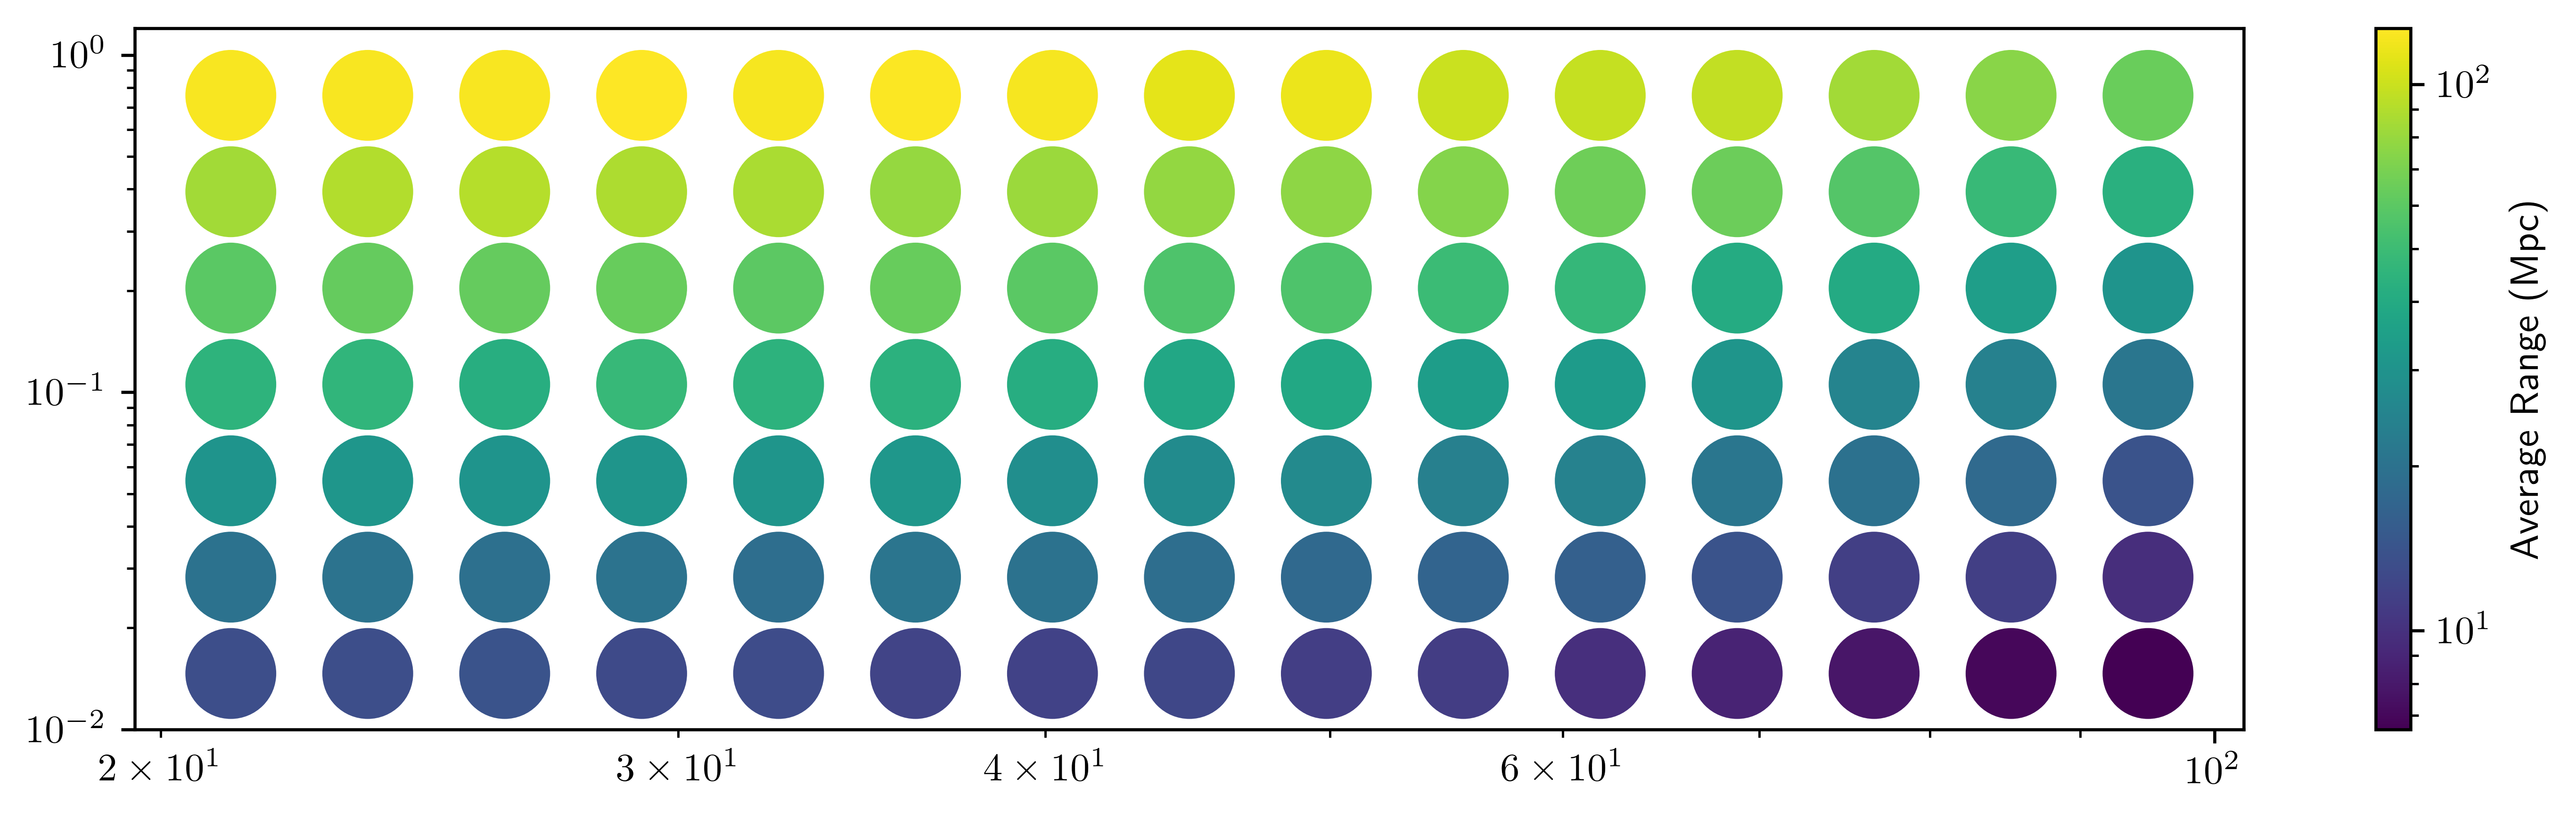

In [47]:
import matplotlib.colors as colors
import pylab

pylab.rc('text', usetex=True)
pylab.figure(figsize=[10,3], dpi=600)

pylab.scatter(mp1, mp2, c=dp, s=490, norm=colors.LogNorm())

c = pylab.colorbar()
c.set_label('Average Range (Mpc)')

pylab.ylim(.01, 1.2)
pylab.xscale('log')
pylab.yscale('log')
pylab.tight_layout()
